In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [7]:
# read data from fbref and only load 23-24 league table
df = pd.read_html('https://fbref.com/en/comps/12/La-Liga-Stats', attrs={'id':'results2023-2024121_overall'})[0]

In [8]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Real Madrid,15,12,2,1,33,9,24,38,2.53,27.3,15.3,12.1,0.80,W D W W W,69443,Jude Bellingham - 11,Kepa Arrizabalaga,NaN
1,2,Girona,15,12,2,1,34,18,16,38,2.53,27.9,19.2,8.7,0.58,W W W D W,12640,Artem Dovbyk - 7,Paulo Gazzaniga,NaN
2,3,Barcelona,15,10,4,1,28,14,14,34,2.27,30.4,14.9,15.5,1.03,L W W D W,41263,Robert Lewandowski - 7,Marc-André ter Stegen,NaN
3,4,Atlético Madrid,14,10,1,3,30,13,17,31,2.21,25.2,13.8,11.4,0.81,W L W W L,58433,Antoine Griezmann - 9,Jan Oblak,NaN
4,5,Athletic Club,15,8,4,3,30,18,12,28,1.87,26.4,16.7,9.7,0.65,D W W D W,44825,"Iñaki Williams, Gorka Guruzeta - 7",Unai Simón,NaN


In [21]:
# load team badge png files, downloaded from McKay Github
df['badge'] = df['Squad'].apply(
    lambda x: 
    f"/Users/georgemathew/Downloads/soccer/team_logos/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}_logo.png"
)

In [22]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,badge
0,1,Real Madrid,15,12,2,1,33,9,24,38,...,27.3,15.3,12.1,0.80,W D W W W,69443,Jude Bellingham - 11,Kepa Arrizabalaga,NaN,/Users/georgemathew/Downloads/soccer/team_logo...
1,2,Girona,15,12,2,1,34,18,16,38,...,27.9,19.2,8.7,0.58,W W W D W,12640,Artem Dovbyk - 7,Paulo Gazzaniga,NaN,/Users/georgemathew/Downloads/soccer/team_logo...
2,3,Barcelona,15,10,4,1,28,14,14,34,...,30.4,14.9,15.5,1.03,L W W D W,41263,Robert Lewandowski - 7,Marc-André ter Stegen,NaN,/Users/georgemathew/Downloads/soccer/team_logo...
3,4,Atlético Madrid,14,10,1,3,30,13,17,31,...,25.2,13.8,11.4,0.81,W L W W L,58433,Antoine Griezmann - 9,Jan Oblak,NaN,/Users/georgemathew/Downloads/soccer/team_logo...
4,5,Athletic Club,15,8,4,3,30,18,12,28,...,26.4,16.7,9.7,0.65,D W W D W,44825,"Iñaki Williams, Gorka Guruzeta - 7",Unai Simón,NaN,/Users/georgemathew/Downloads/soccer/team_logo...


In [24]:
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'badge'],
      dtype='object')

In [25]:
# change order of columns so badge is first
df = df[['Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90']]

In [27]:
df.head()

,Rk,badge,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,/Users/georgemathew/Downloads/soccer/team_logo...,Real Madrid,15,12,2,1,33,9,24,38,2.53,27.3,15.3,12.1,0.80
1,2,/Users/georgemathew/Downloads/soccer/team_logo...,Girona,15,12,2,1,34,18,16,38,2.53,27.9,19.2,8.7,0.58
2,3,/Users/georgemathew/Downloads/soccer/team_logo...,Barcelona,15,10,4,1,28,14,14,34,2.27,30.4,14.9,15.5,1.03
3,4,/Users/georgemathew/Downloads/soccer/team_logo...,Atlético Madrid,14,10,1,3,30,13,17,31,2.21,25.2,13.8,11.4,0.81
4,5,/Users/georgemathew/Downloads/soccer/team_logo...,Athletic Club,15,8,4,3,30,18,12,28,1.87,26.4,16.7,9.7,0.65


In [30]:
# define colors with coolors
bg_color = '#FFFFFF'
text_color = '#000000'

row_colors = {
    'top4':'#92BFB1',
    'top6':'#F6F5AE',
    'relegation':'#E8998D'
}

plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = 'monospace'

In [50]:
# customize each column
col_defs = [
    ColumnDefinition(
        name='Rk',
        textprops={'ha':'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='badge',
        textprops={'ha': 'center', 'va':'center', 'color':bg_color},
        width=0.5,
        plot_fn=image
    ),
    ColumnDefinition(
        name='Squad',
        textprops={'ha': 'left', 'weight':'bold'},
        width=1.75,
    ),
    ColumnDefinition(
        name='MP',
        group='Matches Played',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='W',
        group='Matches Played',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='D',
        group='Matches Played',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='L',
        group='Matches Played',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='GF',
        group='Goals',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='GA',
        group='Goals',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='GD',
        group='Goals',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='Pts',
        group='Points',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='Pts/MP',
        group='Points',
        textprops={'ha': 'center'},
        width=0.5
    ),
    ColumnDefinition(
        name='xG',
        group='Expected Goals',
        textprops={'ha': 'center', 'color':text_color, 'weight':'bold', 
                   'bbox':{'boxstyle':'circle', 'pad':.35}},
        cmap=normed_cmap(df['xG'], cmap=matplotlib.cm.PiYG, num_stds=2),
        width=0.5
    ),
    ColumnDefinition(
        name='xGA',
        group='Expected Goals',
        textprops={'ha': 'center', 'color':text_color, 'weight':'bold', 
                   'bbox':{'boxstyle':'circle', 'pad':.35}},
        cmap=normed_cmap(df['xGA'], cmap=matplotlib.cm.PiYG_r, num_stds=2),
        width=0.5
    ),
    ColumnDefinition(
        name='xGD',
        group='Expected Goals',
        textprops={'ha': 'center', 'color':text_color, 'weight':'bold', 
                   'bbox':{'boxstyle':'circle', 'pad':.35}},
        cmap=normed_cmap(df['xGD'], cmap=matplotlib.cm.PiYG, num_stds=2),
        width=0.5
    )
]

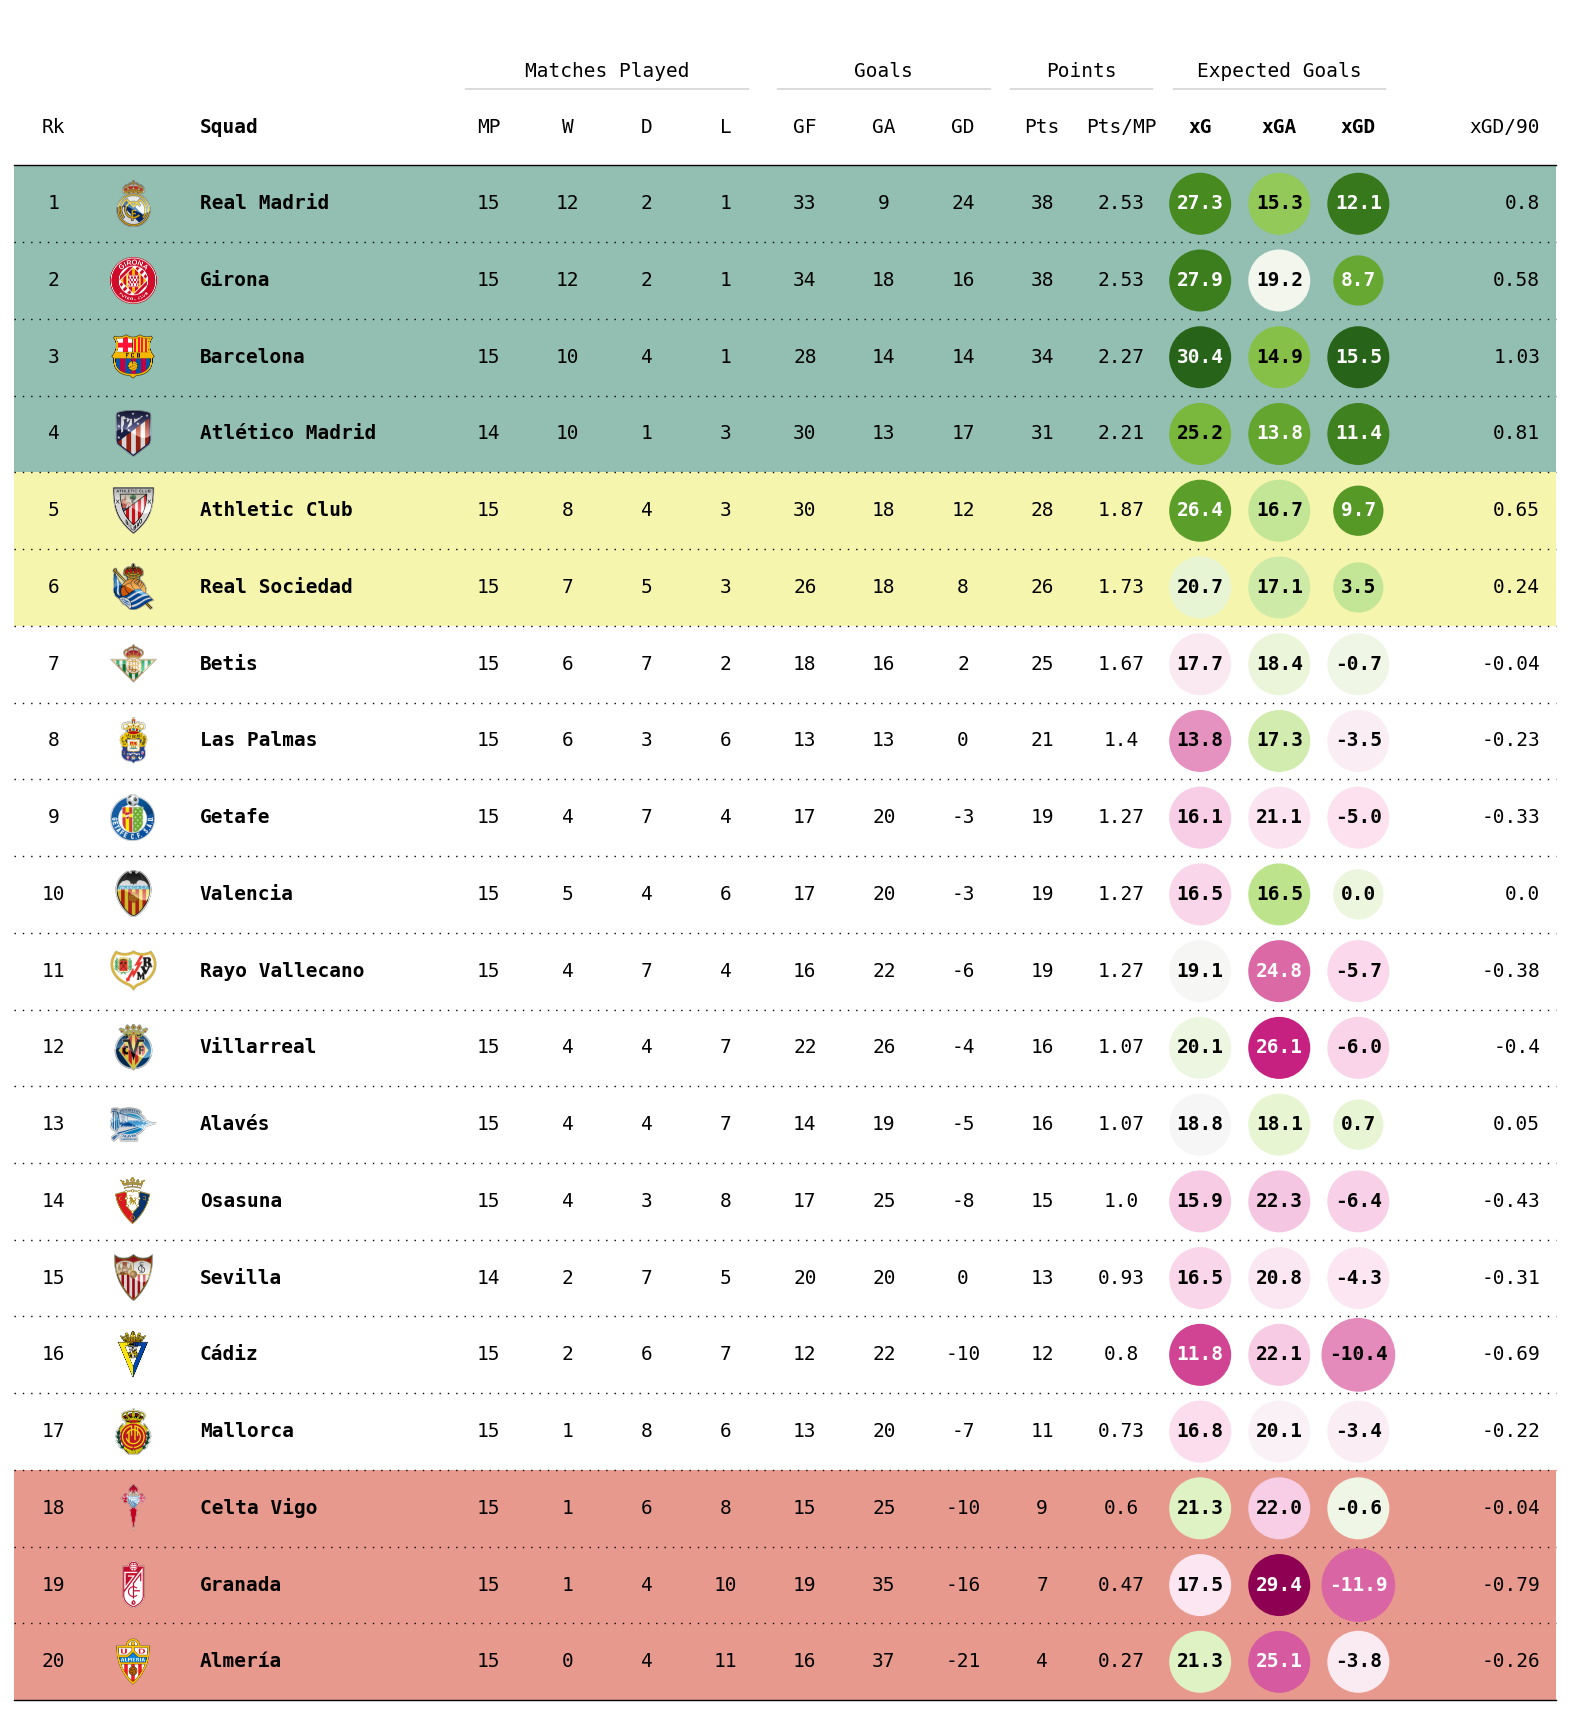

In [64]:
# make table
fig, ax = plt.subplots(figsize=[20,22])
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    df,
    column_definitions=col_defs,
    index_col='Rk',
    row_dividers=True,
    row_divider_kw={'linewidth':1, 'linestyle':(0,(1,5))},
    footer_divider=True,
    textprops={'fontsize':14},
    ax=ax
).autoset_fontcolors(colnames=['xG', 'xGA', 'xGD'])

for idx in range(4):
    table.rows[idx].set_facecolor(row_colors['top4'])
for idx in range(4,6):
    table.rows[idx].set_facecolor(row_colors['top6'])
for idx in range(17,20):
    table.rows[idx].set_facecolor(row_colors['relegation'])

In [68]:
fig.savefig(
    '/Users/georgemathew/Downloads/LaLiga_table/laliga_table.png',
    facecolor = ax.get_facecolor(),
    dpi=200,
    bbox_inches='tight'
)